<a href="https://colab.research.google.com/github/Zayoco/SIS-420-IA/blob/main/2do_parcial_Calle_Choque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

#Usamos la libreria de pandas
import pandas as pd
# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy optimiza la funcion de costo
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Lee los datos del archivo CSV utilizando la función read_csv() de pandas y los almacena en un DataFrame llamado data.
data = pd.read_csv('/content/drive/MyDrive/DATASETS/TMNIST_Data.csv')
data

# Extrae las características (X) del DataFrame data utilizando la función iloc[] de pandas,
# seleccionando todas las filas (:) y todas las columnas excepto la primera (1:), y las almacena en la variable X.
X = data.iloc[:, 2:].values
# Extrae las etiquetas (números escritos a mano) del DataFrame data seleccionando la columna 'label'
# y las almacena en la variable y.
y = data['labels'].values

# Divide los datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split().
# El parámetro test_size=0.2 especifica que el 20% de los datos se utilizarán como conjunto de prueba,
# mientras que el 80% se utilizará como conjunto de entrenamiento. El parámetro random_state=42 asegura
# que la división sea reproducible.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprime las formas de los conjuntos de entrenamiento y las etiquetas de entrenamiento
print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (23920, 784)
Training Labels: (23920,)


In [14]:
# Imprime las formas de los conjuntos de prueba y las etiquetas de prueba
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))
#print(y)
print(X)

Testing Data: (5980, 784)
Testing Labels: (5980,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
X = x_train
Y = y_train

# Normaliza los valores de píxeles en las imágenes para que estén en el rango de 0 a 1.
# Para ello, se convierten los valores de píxeles a valores de tipo float y luego se dividen por 255,
# que es el valor máximo de un píxel en una imagen en escala de grises (0 representa el negro y 255 el blanco).
X = X.astype(float) / 255.

# Imprime las formas de la matriz X y la primera imagen en X para verificar los cambios realizados.
print(X.shape)
print(X[0].shape)

(23920, 784)
(784,)


In [16]:
# Importa la clase MiniBatchKMeans, algoritmo de agrupamiento K-Means que utiliza mini lotes de datos para acelerar el proceso
# de entrenamiento en grandes conjuntos de datos
from sklearn.cluster import MiniBatchKMeans

# Calcula el número de dígitos únicos en el conjunto de datos de prueba y_test utilizando np.unique
n_digits = len(np.unique(y_test))
print(n_digits)

# Inicializa un objeto de la clase MiniBatchKMeans con el número de clusters igual al número de dígitos únicos
# en el conjunto de datos de prueba. Esto prepara el modelo K-means para agrupar los datos.
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Ajusta el modelo K-means a los datos de entrenamiento X utilizando el método fit().
# Esto lleva a cabo el proceso de agrupamiento, donde los centroides se ajustan a los datos para minimizar
# la distancia entre los puntos(imagen) de datos y sus centroides respectivos.

# Inicialización de centroides: El método inicializa los centroides iniciales.
# Estos centroides son puntos en el espacio de características alrededor de los cuales se agruparán los datos.

# Asignación de puntos a clusters: Luego, para cada punto en el conjunto de datos X,
# el método determina a qué cluster pertenece calculando la distancia entre el punto
# y los centroides. Cada punto se asigna al cluster cuyo centroide está más cerca de él.

# Actualización de centroides: Después de asignar todos los puntos a clusters,
# el método actualiza los centroides recalculando sus posiciones como el
# promedio de las posiciones de todos los puntos asignados a ese cluster.
# Este paso ajusta los centroides para que estén más cerca de los puntos asignados a sus respectivos clusters.

# Iteración: Los pasos 2 y 3 se repiten iterativamente hasta que se cumple un criterio de convergencia,
# como alcanzar un número máximo de iteraciones o hasta que la diferencia entre las posiciones de los
# centroides en iteraciones consecutivas sea menor que una cierta tolerancia.

# Resultado: Una vez que se alcanza la convergencia, el método fit(X) devuelve el objeto kmeans
# ajustado, que ahora contiene información sobre los centroides finales y las asignaciones de puntos a clusters.
kmeans.fit(X)

10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

In [17]:
def infer_cluster_labels(kmeans, actual_labels):
    # Esta función toma el modelo K-means ajustado kmeans y las etiquetas reales actual_labels.
    # Asocia la etiqueta más probable con cada grupo en el modelo KMeans y devuelve un diccionario que asigna clusters a etiquetas

    # Inicializa un diccionario vacío para almacenar las etiquetas inferidas para cada cluster.
    inferred_labels = {}

    # itera sobre cada cluster en el modelo K-means.
    for i in range(kmeans.n_clusters):

        # Utiliza np.where() para encontrar los índices de los puntos en el cluster actual i.
        labels = []
        index = np.where(kmeans.labels_ == i)

        # Agrega las etiquetas reales correspondientes a los puntos en el cluster actual al final de la lista labels.
        labels.append(actual_labels[index])

        # Determina la etiqueta más común en el cluster actual
        # Si solo hay una etiqueta en el cluster (es decir, len(labels[0]) == 1), utiliza np.bincount(labels[0]) para
        # contar las ocurrencias de cada etiqueta en el cluster.
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            # Si hay más de una etiqueta en el cluster, utiliza np.squeeze(labels) para convertir la lista de etiquetas
            # en un array unidimensional y luego cuenta las ocurrencias de cada etiqueta.
            counts = np.bincount(np.squeeze(labels))

        # Comprueba si la etiqueta más común en el cluster actual ya está presente en el diccionario inferred_labels.
        if np.argmax(counts) in inferred_labels:
            # agregue el nuevo número a la matriz existente en esta ranura
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # crear una nueva matriz en esta ranura
            inferred_labels[np.argmax(counts)] = [i]

    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    # Esta función toma las etiquetas de datos X_labels y el diccionario de clusters a etiquetas cluster_labels.
    # Determina la etiqueta para cada matriz en base al cluster al que se ha asignado y devuelve las etiquetas
    # previstas para cada matriz. Itera a través de cada cluster en X_labels, busca el cluster en el diccionario
    # cluster_labels y asigna la etiqueta correspondiente.

    # Crea un array de ceros con la misma longitud que la lista de etiquetas de los datos de entrada (X_labels).
    # Este array será utilizado para almacenar las etiquetas inferidas para cada punto de datos.
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    # itera sobre cada etiqueta de cluster en la lista X_labels.
    for i, cluster in enumerate(X_labels):
        # se itera a través de cada par clave-valor en el diccionario cluster_labels utilizando el bucle for key,
        # value in cluster_labels.items():.
        for key, value in cluster_labels.items():
            # Se comprueba si la etiqueta del cluster actual (cluster) está presente en los valores del diccionario cluster_labels
            if cluster in value:
                # Si el cluster actual está presente en los valores del diccionario, se asigna la etiqueta correspondiente
                # (clave del diccionario) al punto de datos en el array predicted_labels en la posición i.
                predicted_labels[i] = key

    return predicted_labels

In [18]:
# Llama a la función infer_cluster_labels(kmeans, Y) para obtener un diccionario de clusters asignados a cada etiqueta.
# Esto se almacena en la variable cluster_labels.
cluster_labels = infer_cluster_labels(kmeans, Y)
# Utiliza el método predict() del objeto kmeans para predecir los clusters de los datos de entrada X.
# Estos clusters se almacenan en la variable X_clusters.
X_clusters = kmeans.predict(X)
# Llama a la función infer_data_labels(X_clusters, cluster_labels) para obtener las etiquetas inferidas para cada punto
# de datos en base a los clusters predichos y el diccionario de clusters a etiquetas. Estas etiquetas se almacenan
# en la variable predicted_labels.
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
# Imprime las etiquetas inferidas para los primeros 20 puntos de datos (predicted_labels[:20])
# y las etiquetas reales de estos puntos de datos (Y[:20]).
print (predicted_labels[:50])
print (Y[:50])

[5 0 5 5 5 3 3 7 3 5 5 5 5 3 5 1 5 1 5 4 3 2 3 2 5 1 3 3 7 4 3 7 8 6 4 5 3
 3 3 5 7 3 4 0 2 3 4 7 5 7]
[9 0 8 5 8 7 2 9 4 5 5 5 8 3 5 1 6 1 8 4 7 2 5 2 0 1 7 9 7 4 7 7 9 6 4 0 5
 5 9 8 7 0 4 0 2 3 4 7 8 7]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


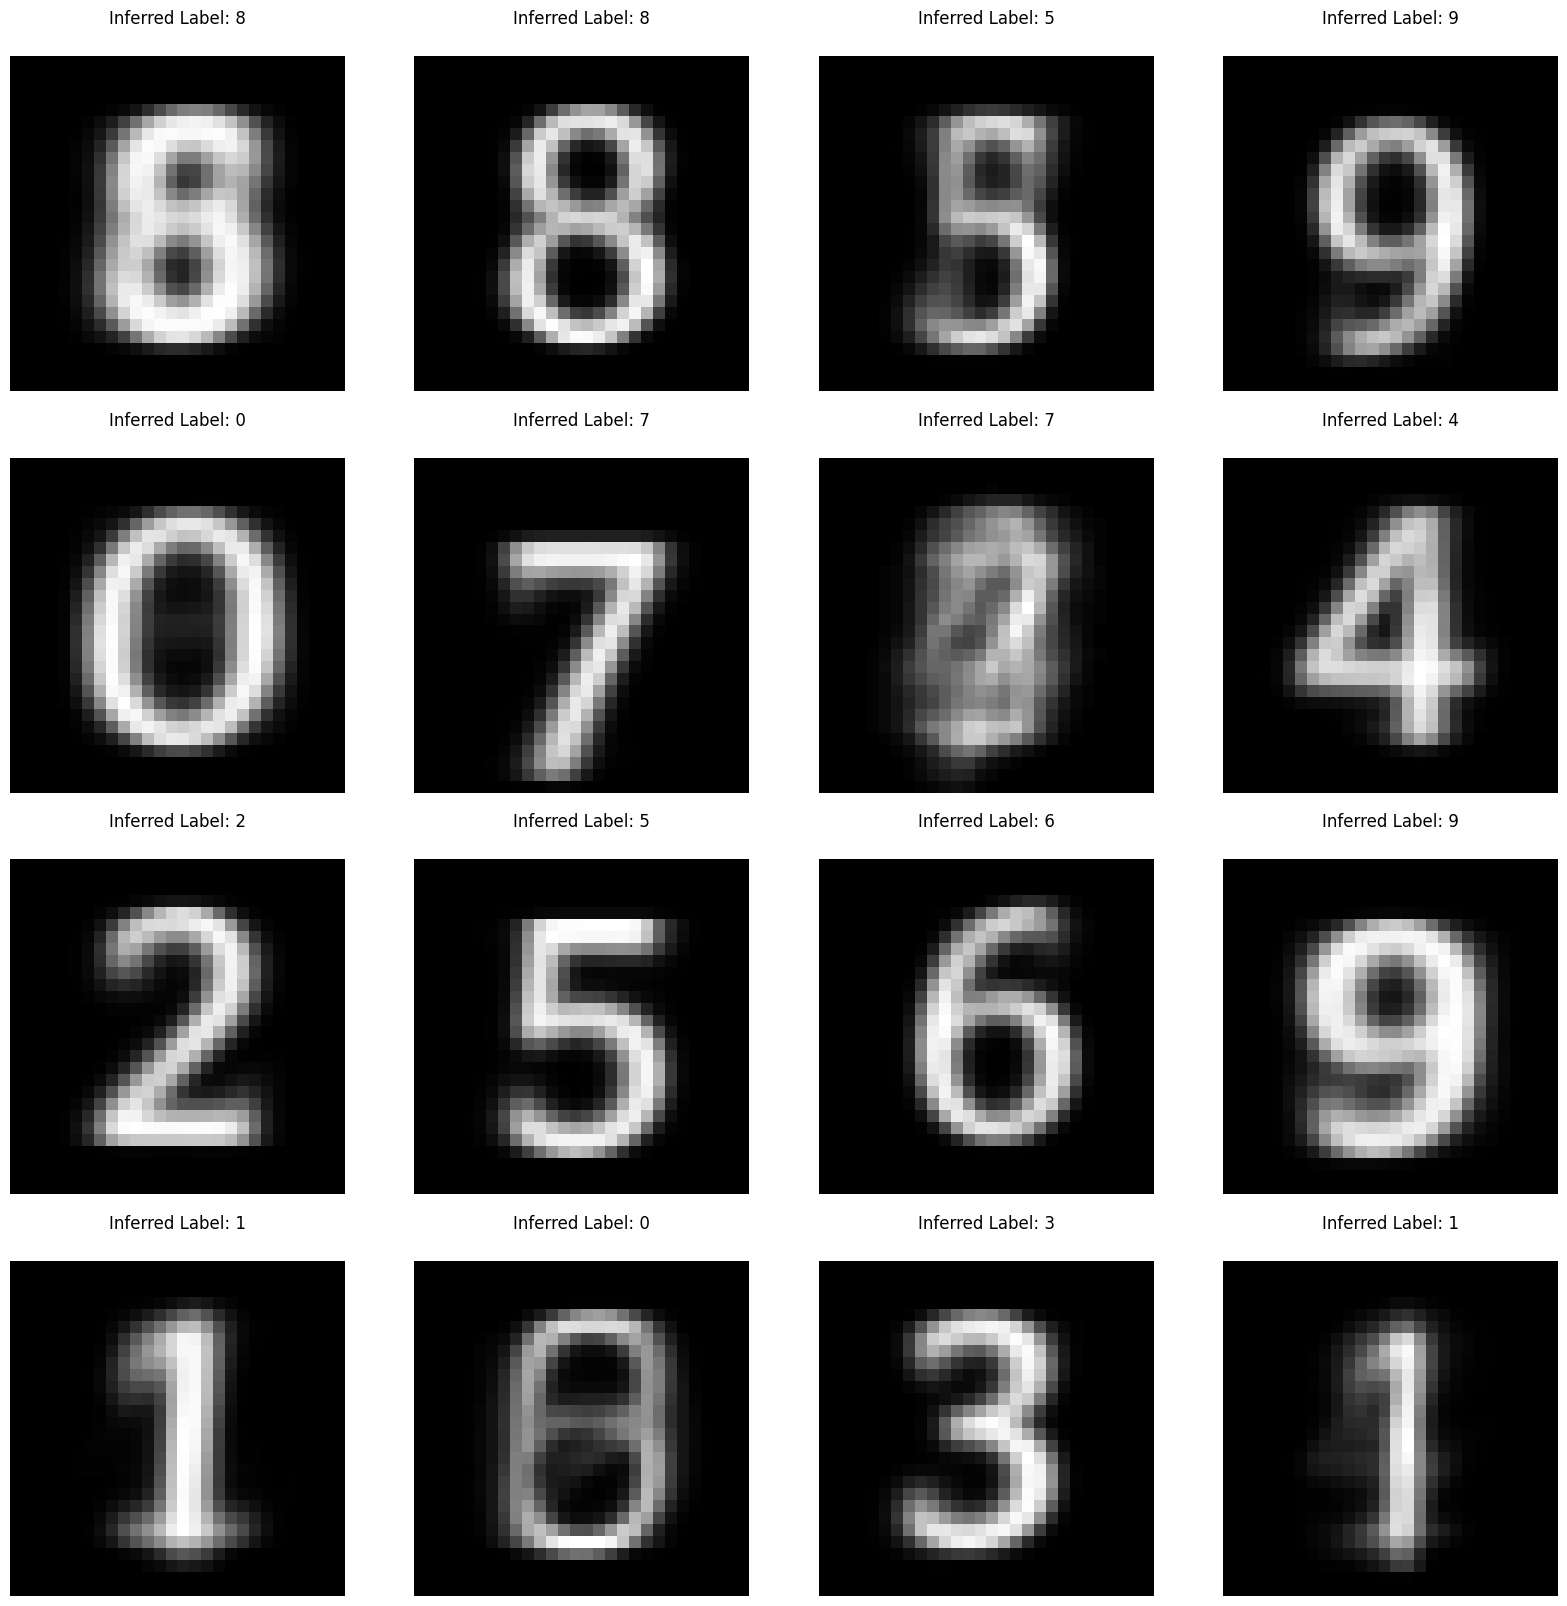

In [19]:
# Inicializar y ajustar el algoritmo KMeans
kmeans = MiniBatchKMeans(n_clusters = 16)
kmeans.fit(X)

# registrar valores de centroide
centroids = kmeans.cluster_centers_

# remodelar los centroides en imágenes
images = centroids.reshape(16, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determinar las etiquetas del grupo
cluster_labels = infer_cluster_labels(kmeans, Y)

# crear figura con subplots usando matplotlib.pyplot
fig, axs = plt.subplots(4, 4, figsize = (20, 20))
plt.gray()

# recorrer subplots y agregar imágenes de centroide
for i, ax in enumerate(axs.flat):

    # determinar la etiqueta inferida usando el diccionario cluster_labels
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))

    # agregar imagen a la trama secundaria
    ax.matshow(images[i])
    ax.axis('off')

# mostrar la figura
fig.show()